In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Read the data:
* The data is already clean from:
  1. outliers
  2. fill NaN values with mean of the column
  3. adapt the data from booking (such as star rating, neighberhood, neighberhood category) per hotels which equal. 

In [86]:
file_path = r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv"
expedia_df = pd.read_csv(file_path)

In [87]:
expedia_df.shape

(19614, 22)

In [88]:
expedia_df.head()

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price
0,55:16.9,26/06/2024,27/06/2024,Penny Williamsburg,1,1,9.69,505,369,419,...,0,0,0,0,3.738393,9.445409,Unknown,2.986364,Unknown,369
1,55:16.9,26/06/2024,27/06/2024,"voco Fiorello - LaGuardia East, an IHG Hotel",1,1,8.48,248,242,269,...,0,0,0,1,3.738393,9.445409,Unknown,2.986364,Unknown,242
2,55:17.0,26/06/2024,27/06/2024,Best Western Queens Gold Coast,1,1,8.08,1007,227,0,...,0,0,0,2,3.738393,9.445409,Unknown,2.986364,Unknown,227
3,55:17.0,26/06/2024,27/06/2024,Radio Hotel,1,1,8.68,1727,194,215,...,0,0,0,4,4.000000,9.445409,Washington Heights,9.800000,Uptown Manhattan,194
4,55:17.0,26/06/2024,27/06/2024,The Ridge Hotel,1,1,8.08,1005,174,214,...,0,0,1,5,3.738393,9.445409,Unknown,2.986364,Unknown,174


# Distributions vizual:

In [89]:
def create_vizual(df):
    # Ensure the reviews column is treated as a string and clean it
    df['reviews'] = df['reviews'].astype(str).str.replace(r'\D', '', regex=True)
    df['reviews'] = df['reviews'].replace('', '0').astype(int)  # Replace empty strings with '0' and convert to int
    # Clean the necessary columns
    df['score'] = df['score'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    df['full_price'] = df['full_price'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    df['full_price'] = df['full_price'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    # Create a DataFrame where each hotel appears only once
    df_unique_hotels = df.drop_duplicates(subset='name')
    # Plot distributions using Matplotlib for unique hotels
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Number of reviews distribution
    axs[0].hist(df_unique_hotels['reviews'], bins=50, color='skyblue', edgecolor='black')
    axs[0].set_title('Distribution of Number of Reviews')
    axs[0].set_xlabel('Number of Reviews')
    axs[0].set_ylabel('Frequency')
    # Hotel score distribution
    axs[1].hist(df_unique_hotels['score'], bins=50, color='salmon', edgecolor='black')
    axs[1].set_title('Distribution of Hotel Scores')
    axs[1].set_xlabel('Hotel Score')
    axs[1].set_ylabel('Frequency')
    # full_price distribution
    axs[2].hist(df['full_price'], bins=50, color='lightgreen', edgecolor='black')
    axs[2].set_title('Distribution of Prices per Night')
    axs[2].set_xlabel('full_price')
    axs[2].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    # Plot distributions using Seaborn for unique hotels
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Number of reviews distribution
    sns.histplot(df_unique_hotels['reviews'], bins=50, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title('Distribution of Number of Reviews')
    axs[0].set_xlabel('Number of Reviews')
    axs[0].set_ylabel('Frequency')
    # Hotel score distribution
    sns.histplot(df_unique_hotels['score'], bins=50, kde=True, ax=axs[1], color='salmon')
    axs[1].set_title('Distribution of Hotel Scores')
    axs[1].set_xlabel('Hotel Score')
    axs[1].set_ylabel('Frequency')
    # full_price distribution
    sns.histplot(df['full_price'], bins=50, kde=True, ax=axs[2], color='lightgreen')
    axs[2].set_title('Distribution of full_price')
    axs[2].set_xlabel('full_price')
    axs[2].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

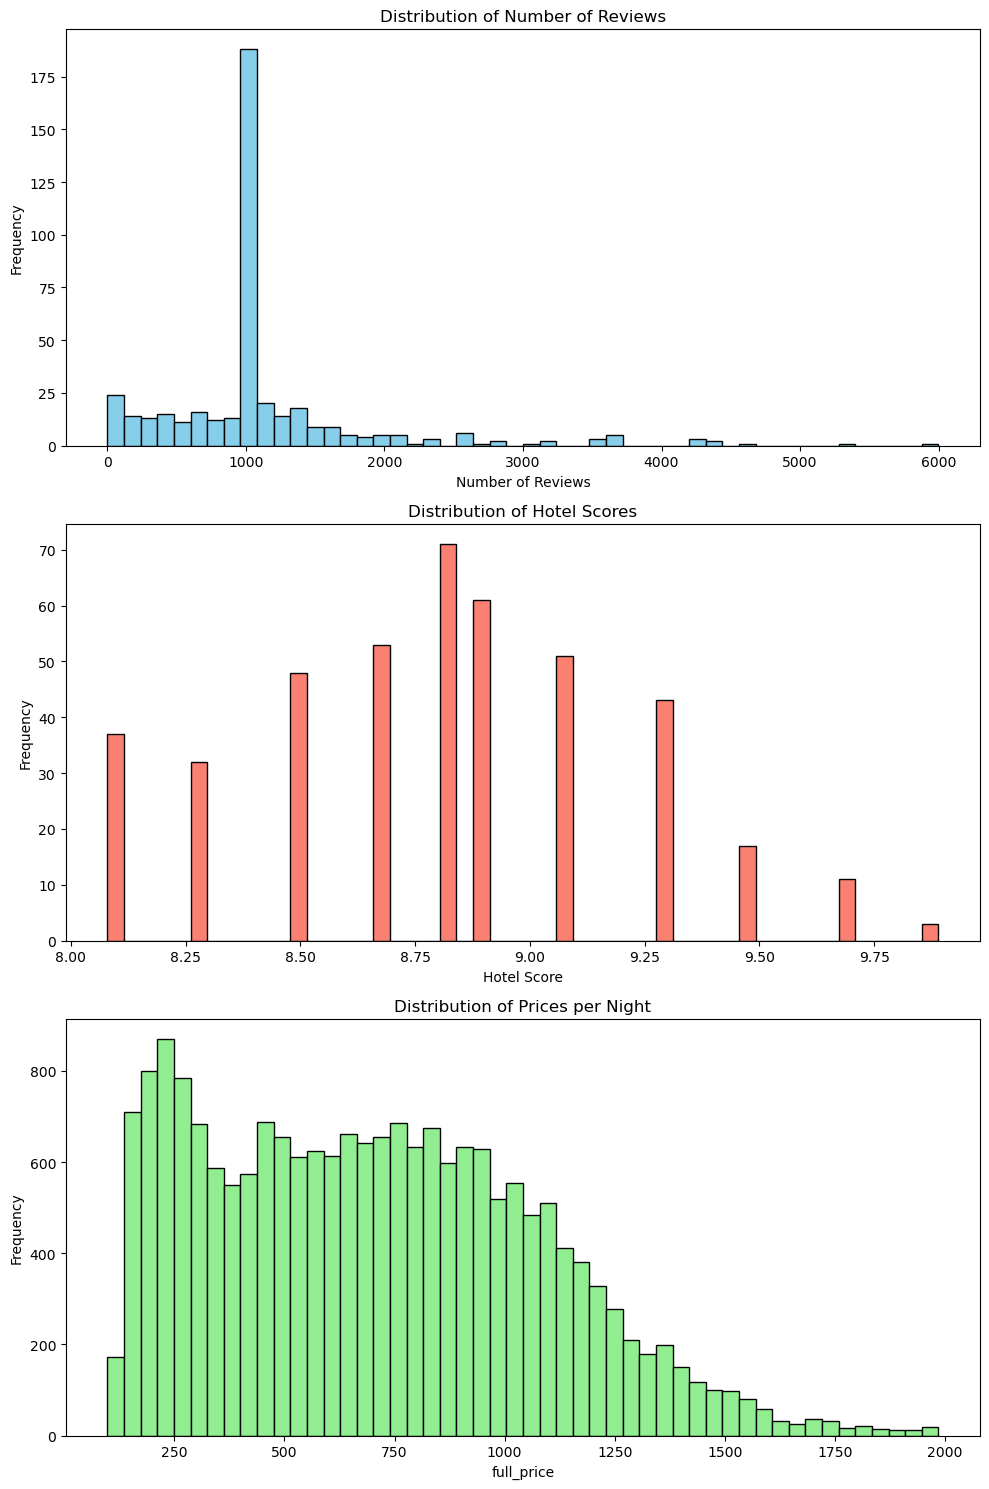

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


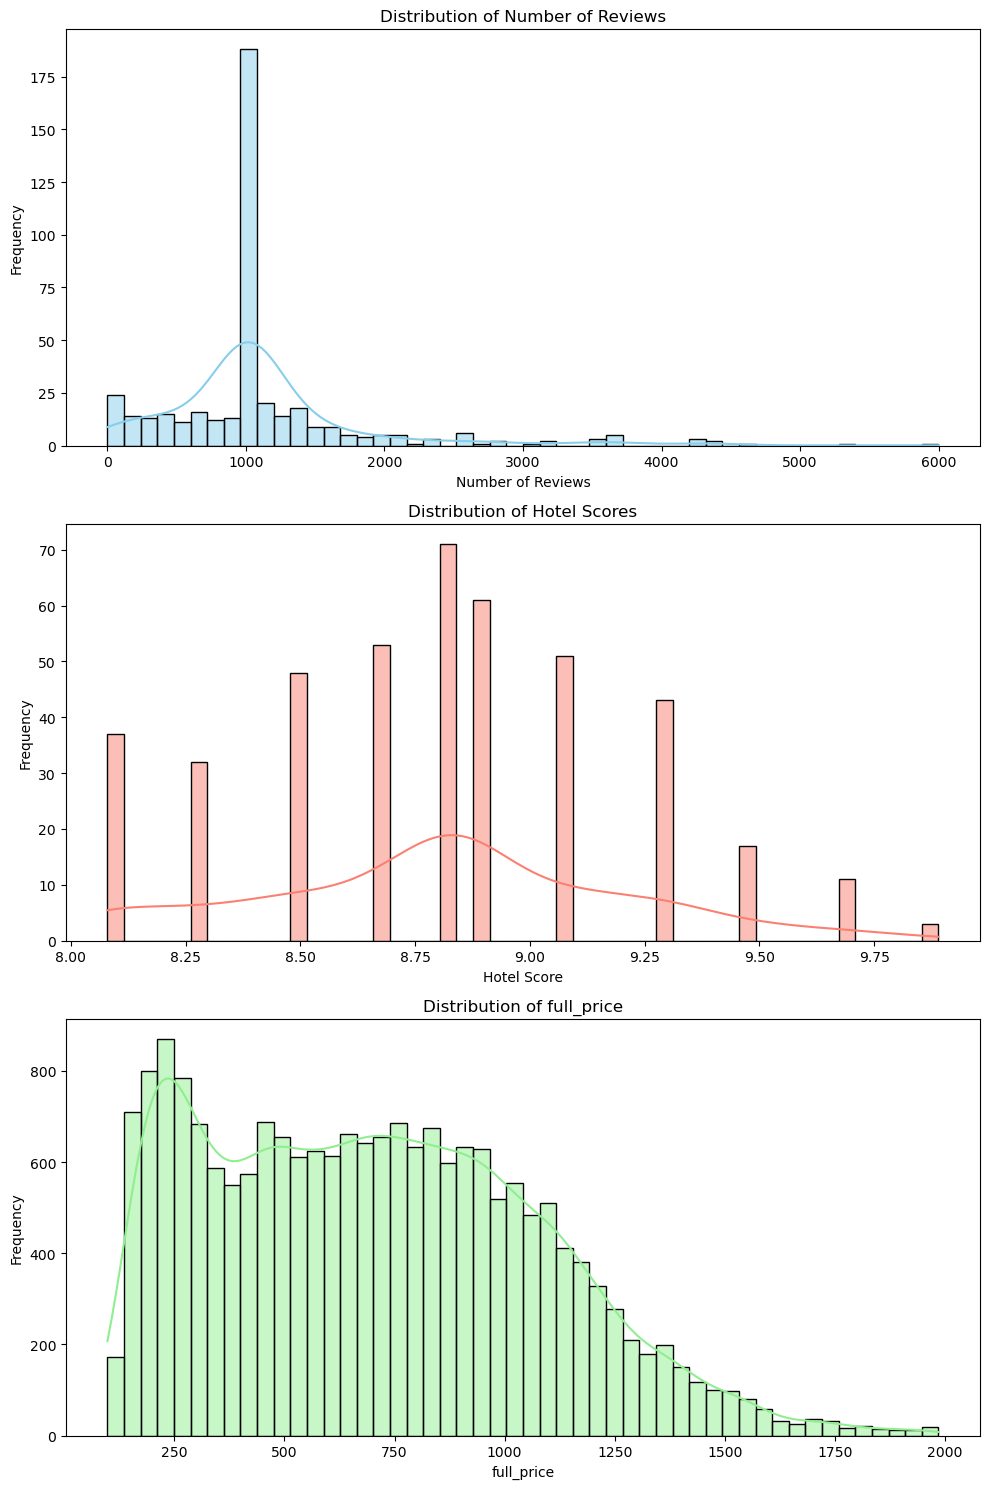

In [90]:
create_vizual(expedia_df)

# Data visualization - the connections between the price and the other parameters:
We will try to understand if there are strong connections to help us make a decision later

In [91]:
def find_correlations(df):
    # Drop 'location_rating' and 'price' columns if they exist
    df_temp = df.drop(columns=['location_rating', 'price'], errors='ignore')

    # Select only numeric columns
    numeric_df = df_temp.select_dtypes(include=[float, int])
    
    # Remove rows with null values in numeric columns
    numeric_df = numeric_df.dropna()
    
    # Verify the data types and the content of the dataframe
    print("Data Types in Numeric DataFrame:")
    print(numeric_df.dtypes)
    print("\nFirst Few Rows of Numeric DataFrame:")
    print(numeric_df.head())
    
    # Check if we have any numeric columns left after dropping NA values
    if numeric_df.empty:
        print("No numeric data available after preprocessing.")
    else:
        # Calculate the correlation matrix
        correlation_matrix = numeric_df.corr()
    
        # Display the correlation matrix
        print("Correlation Matrix:")
        print(correlation_matrix)
    
        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix Heatmap')
        plt.show()
    
        # Visualize the strong relationships
        # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
        strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
        strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
        strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
        # Plot the relationships for strong correlations
        for _, row in strong_correlations.iterrows():
            feature1 = row['Feature 1']
            feature2 = row['Feature 2']
            correlation = row['Correlation']
            
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=numeric_df, x=feature1, y=feature2)
            plt.title(f'Scatter Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()
    
        # Specifically visualize the relationship between 'full_price' and other parameters
        if 'full_price' in numeric_df.columns:
            price_correlations = correlation_matrix['full_price'].sort_values(ascending=False)
            print("full_price Correlations:")
            print(price_correlations)
    
            # Plot the relationships for 'full_price'
            for feature in price_correlations.index:
                if feature != 'full_price':
                    plt.figure(figsize=(8, 6))
                    sns.scatterplot(data=numeric_df, x=feature, y='full_price')
                    plt.title(f'Scatter Plot between {feature} and full_price (Correlation: {price_correlations[feature]:.2f})')
                    plt.xlabel(feature)
                    plt.ylabel('full_price')
                    plt.show()
        else:
            print("Column 'full_price' not found in the numerical columns.")

Data Types in Numeric DataFrame:
TTT                    int64
LOS                    int64
score                float64
reviews                int32
price_per_night        int64
original_price         int64
discount_perc        float64
Free_cancellation      int64
No_payment             int64
Breakfast              int64
Option Member          int64
Index                  int64
star_rating          float64
km_from_center       float64
full_price           float64
dtype: object

First Few Rows of Numeric DataFrame:
   TTT  LOS  score  reviews  price_per_night  original_price  discount_perc  \
0    1    1   9.69      505              369             419      11.933174   
1    1    1   8.48      248              242             269      10.037175   
2    1    1   8.08     1007              227               0       0.000000   
3    1    1   8.68     1727              194             215       9.767442   
4    1    1   8.08     1005              174             214      18.691589   

   Fr

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


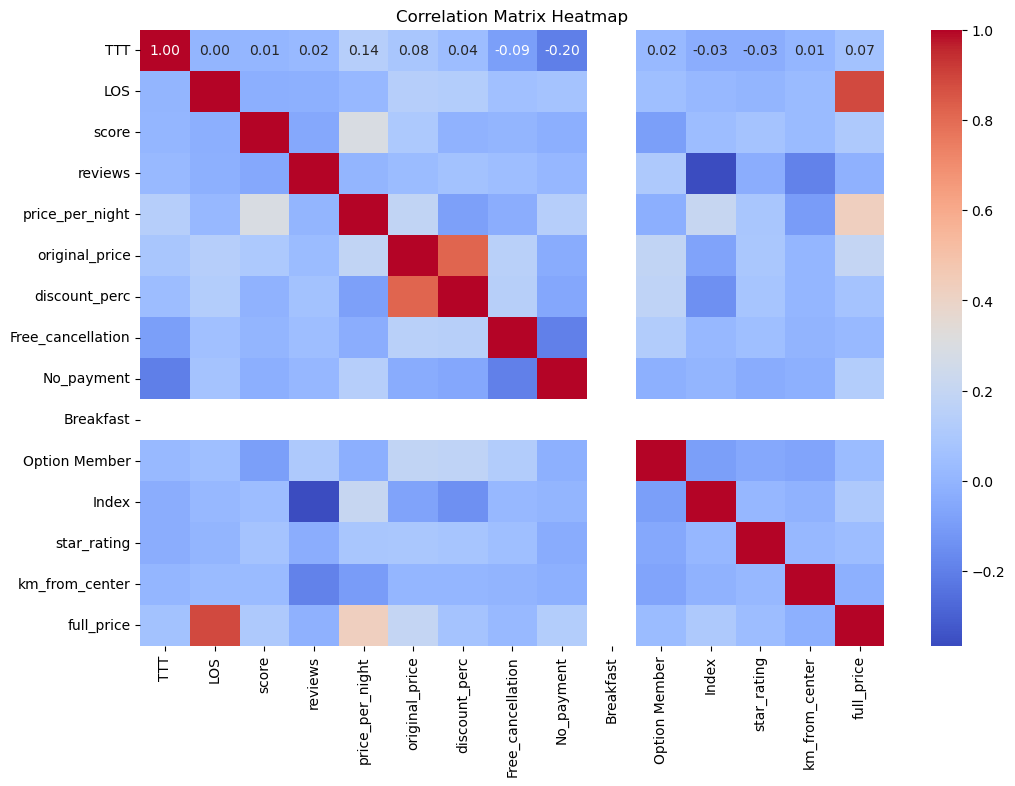

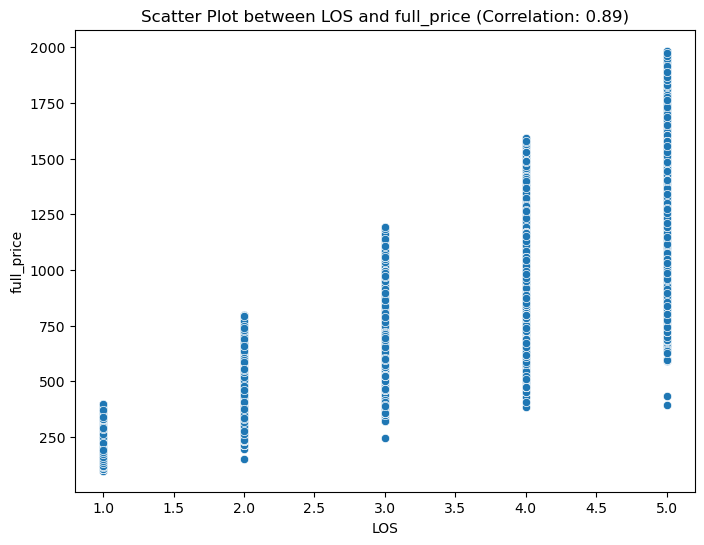

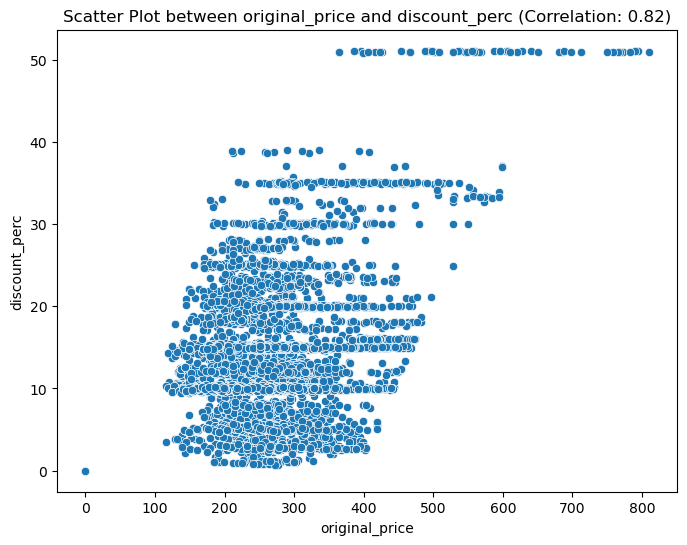

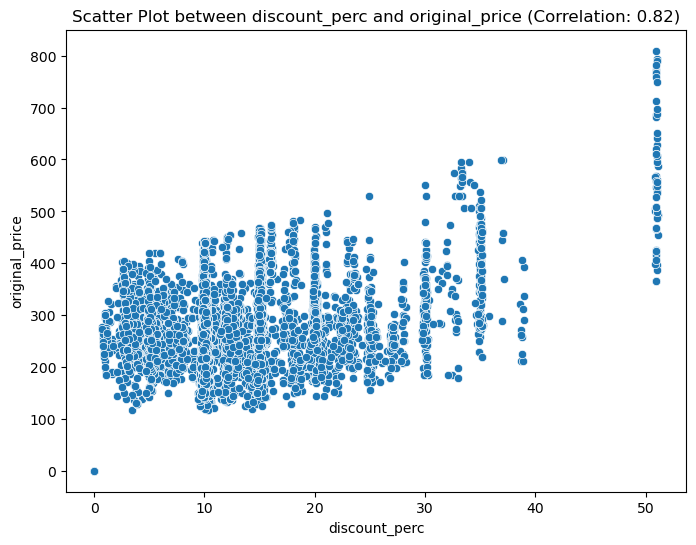

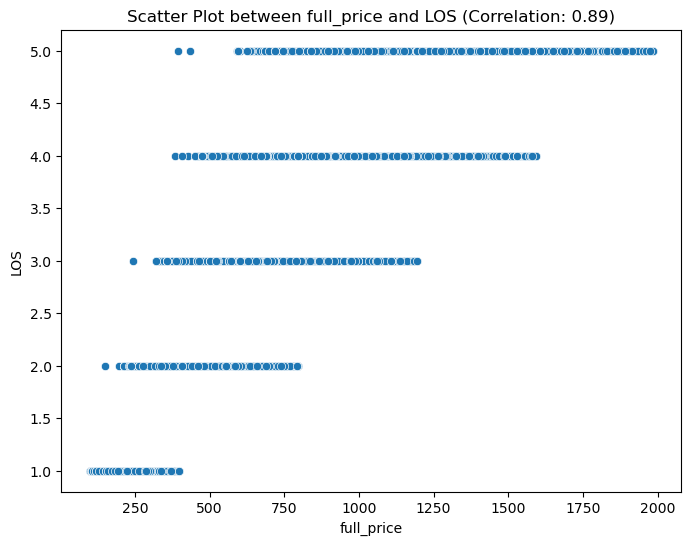

full_price Correlations:
full_price           1.000000
LOS                  0.886260
price_per_night      0.426798
original_price       0.199493
No_payment           0.130697
Index                0.108224
score                0.105952
discount_perc        0.070980
TTT                  0.065457
star_rating          0.036632
Option Member        0.031918
Free_cancellation    0.023681
reviews             -0.018185
km_from_center      -0.021970
Breakfast                 NaN
Name: full_price, dtype: float64


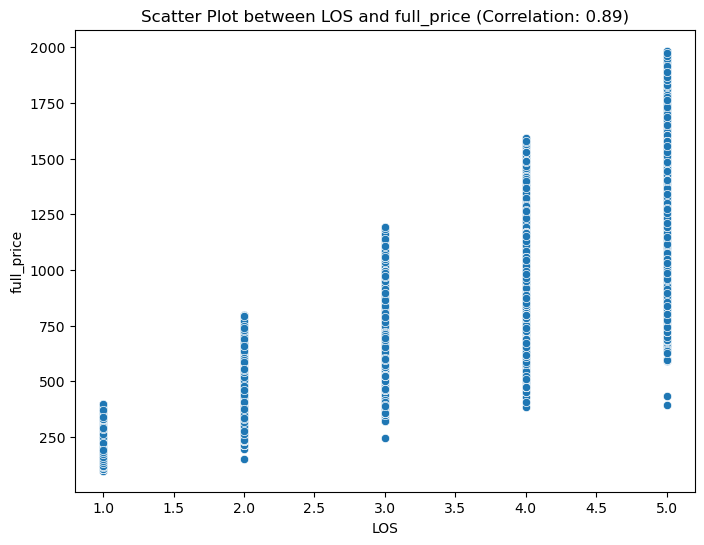

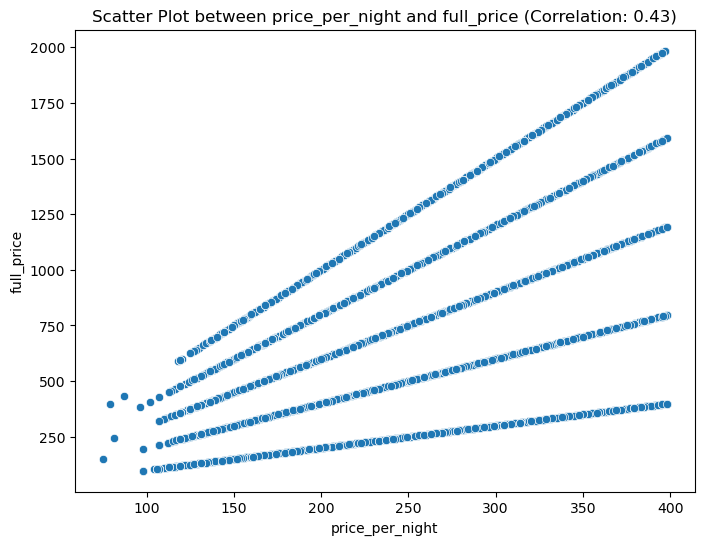

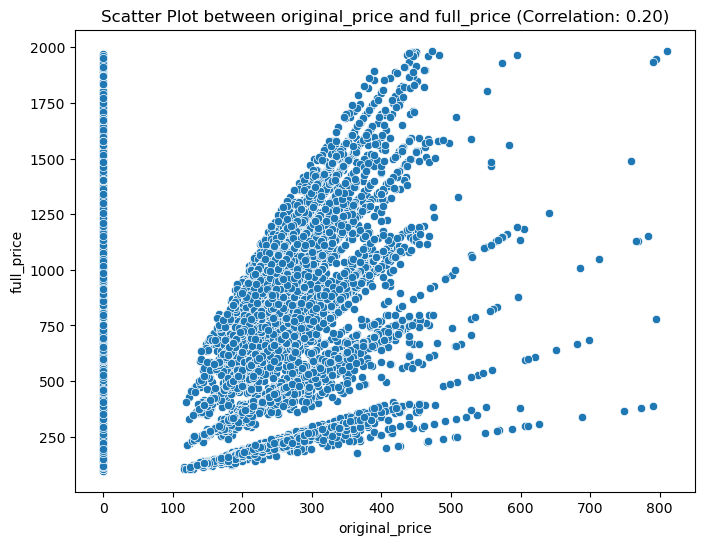

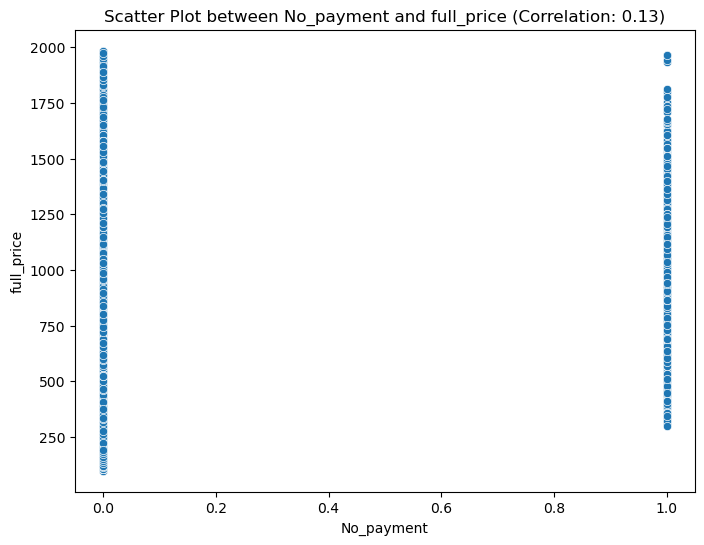

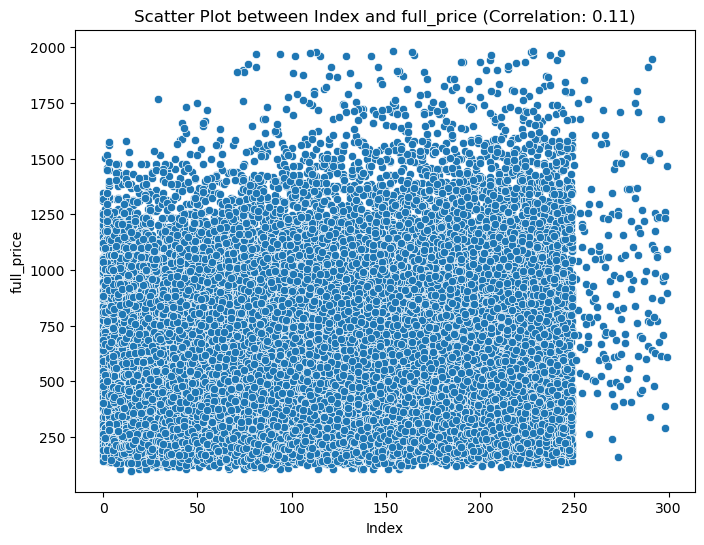

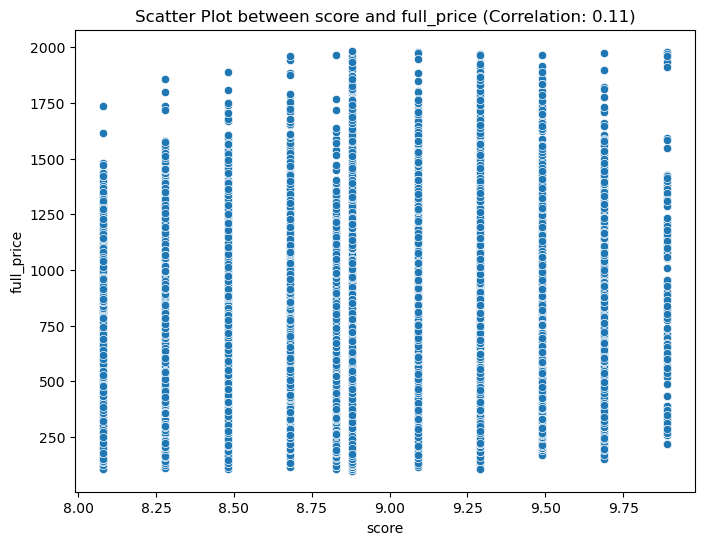

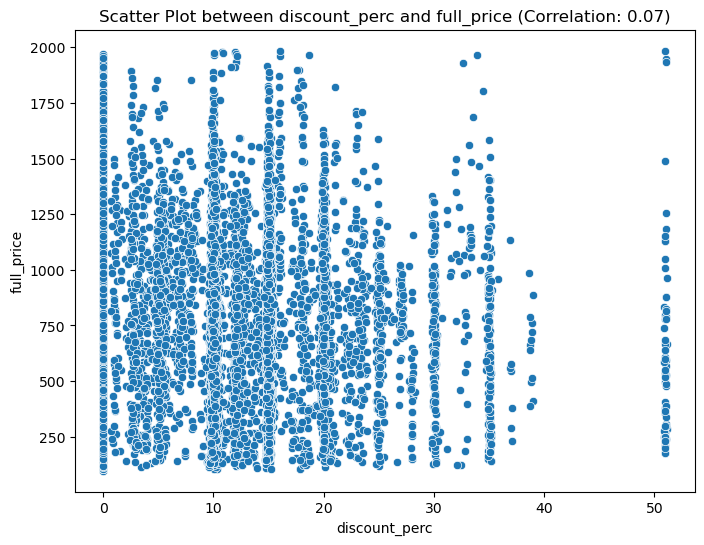

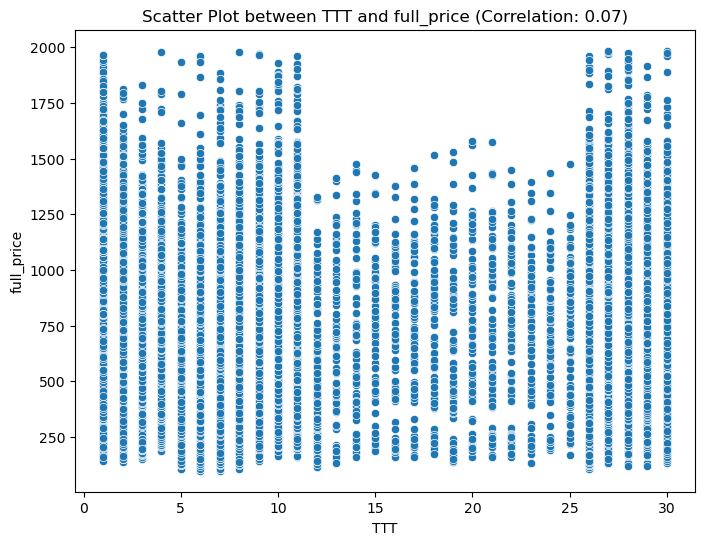

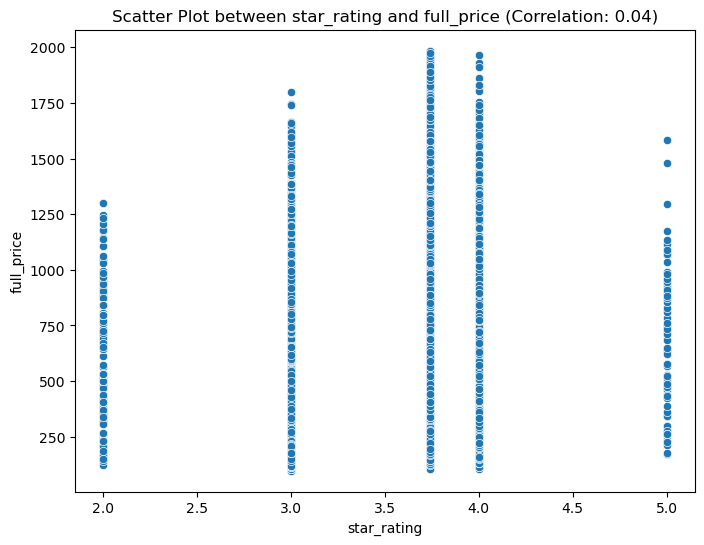

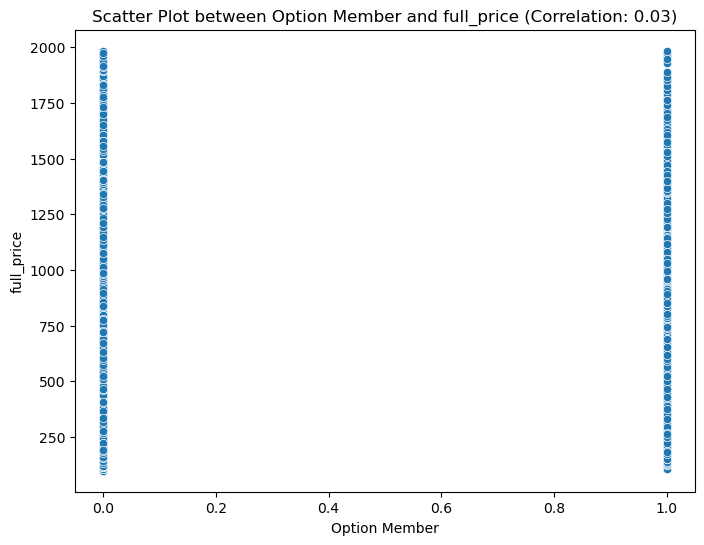

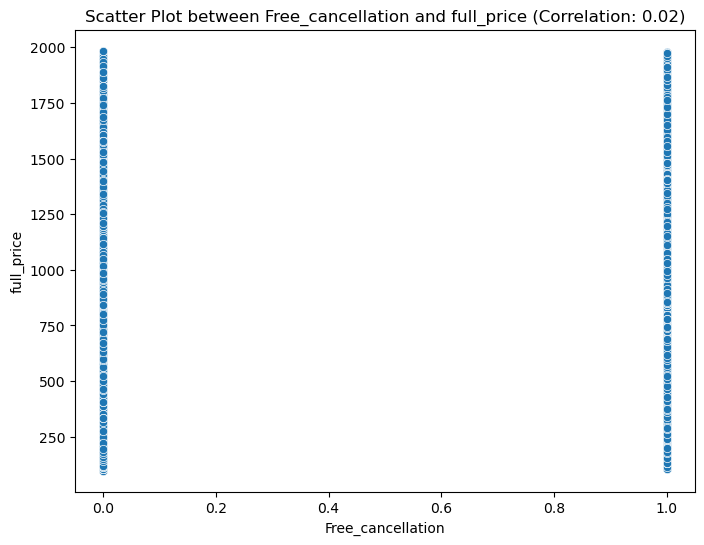

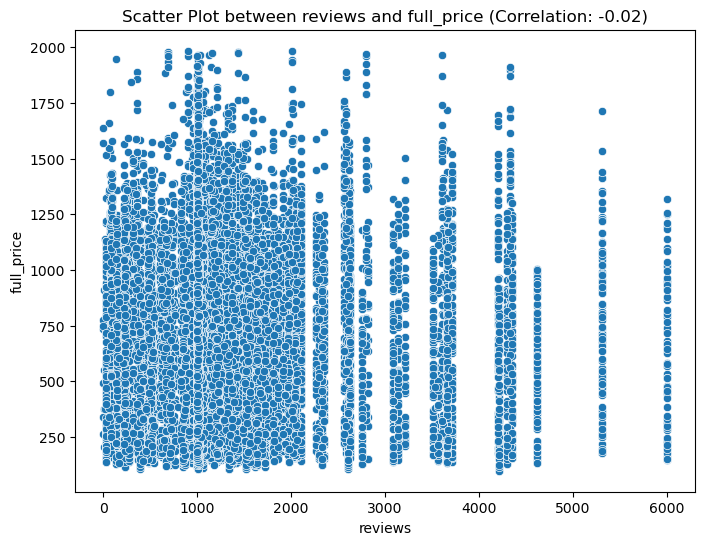

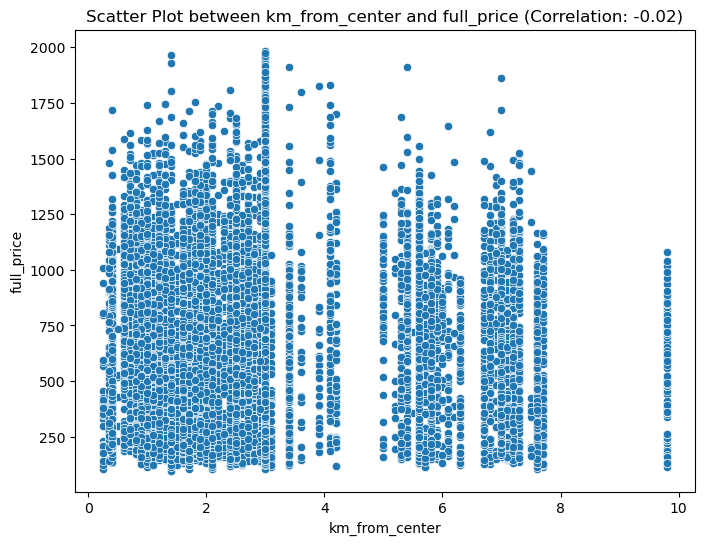

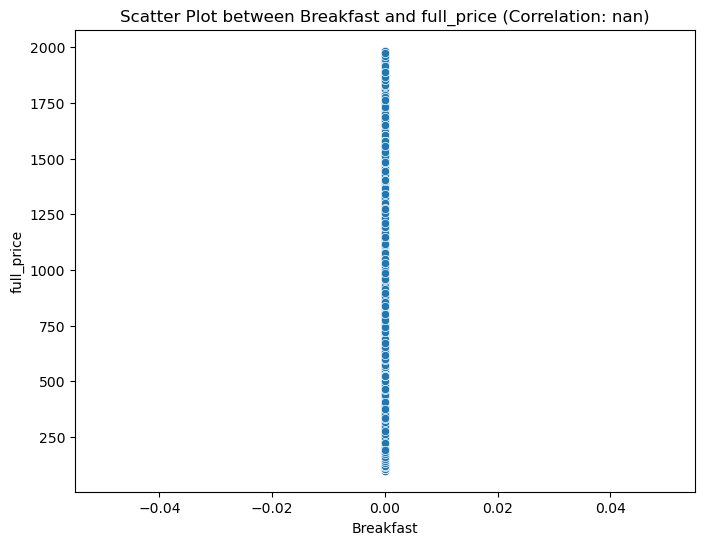

In [93]:
find_correlations(expedia_df)

# neighberhood category effect on the price: 

In [94]:
df_unique_hotels = expedia_df.drop_duplicates(subset='name')
# Count the number of unique neighborhoods
num_neighborhoods = df_unique_hotels['neighborhood'].nunique()
# Print the result
print(f'There are {num_neighborhoods} unique neighborhoods in the data.')


# Count the number of hotels in each neighborhood
hotels_per_neighborhood = expedia_df.groupby('neighborhood').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_neighborhood)

There are 23 unique neighborhoods in the data.
          neighborhood  hotel_count
0              Chelsea          882
1            Chinatown          314
2          East Harlem            1
3         East Village           26
4    Flatiron District           96
5             Gramercy           61
6    Greenwich Village          133
7               Harlem           56
8       Hell's Kitchen         1233
9         Hudson Yards            5
10        Little Italy           66
11     Lower East Side          338
12           Manhattan         4126
13        Midtown East          811
14         Murray Hill          453
15               NoMad          718
16                SoHo          269
17             Tribeca          143
18        Union Square           95
19             Unknown         9478
20     Upper East Side           25
21     Upper West Side          201
22  Washington Heights           84


In [95]:
hotels_per_new_neighborhood = expedia_df.groupby('neighborhood_category').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_new_neighborhood)

  neighborhood_category  hotel_count
0    Downtown Manhattan         2198
1     Midtown Manhattan         3445
2       Other Manhattan         4126
3               Unknown         9478
4      Uptown Manhattan          367


Sample data from the DataFrame:
    neighborhood_category  original_price  LOS  full_price
0                 Unknown             419    1       369.0
1                 Unknown             269    1       242.0
2                 Unknown               0    1       227.0
3        Uptown Manhattan             215    1       194.0
4                 Unknown             214    1       174.0
..                    ...             ...  ...         ...
495       Other Manhattan             432    4      1468.0
496       Other Manhattan               0    4       988.0
497               Unknown             307    4      1044.0
498       Other Manhattan               0    4      1588.0
499     Midtown Manhattan             497    4      1568.0

[500 rows x 4 columns]
Average full_price for each neighborhood:
  neighborhood_category  full_price
0    Downtown Manhattan  683.553230
1     Midtown Manhattan  663.280697
2       Other Manhattan  667.267329
3               Unknown  735.160477
4      Uptown 

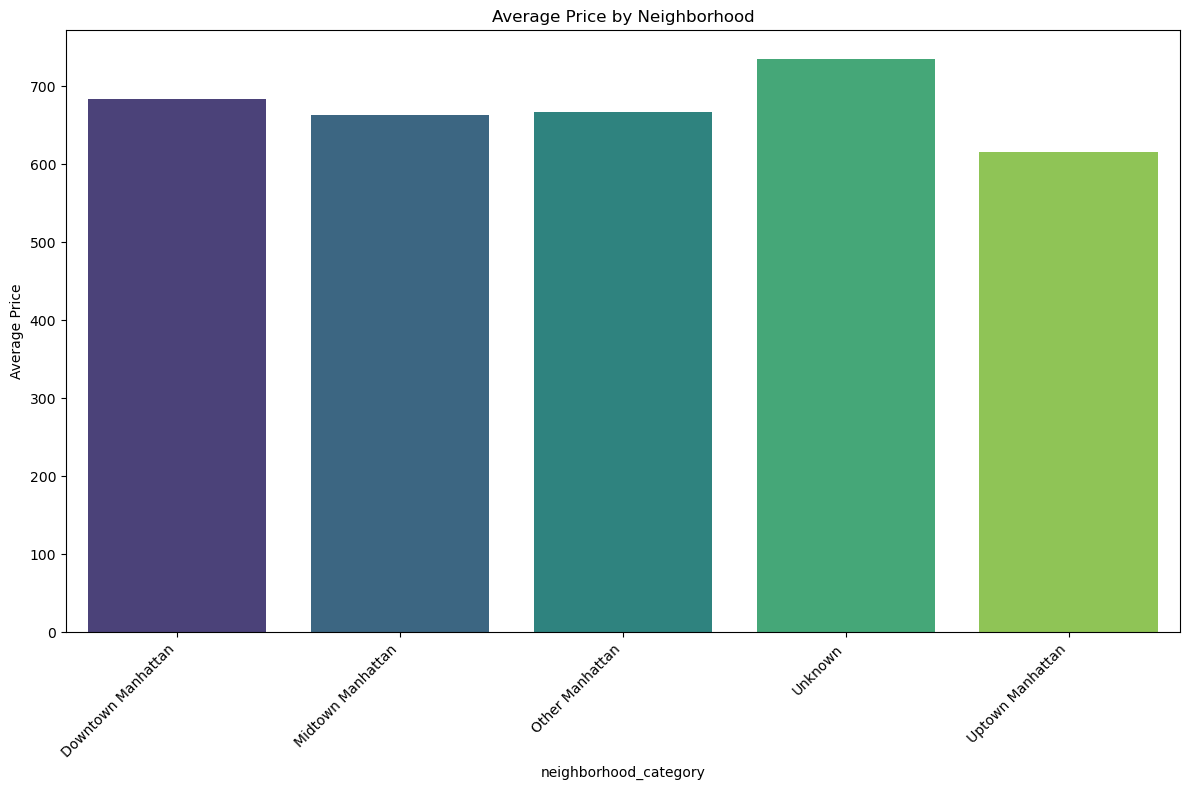

In [96]:
# Check the full_price column
print("Sample data from the DataFrame:")
print(expedia_df[['neighborhood_category', 'original_price', 'LOS', 'full_price']].head(500))

# Ensure that the necessary columns exist and are in the correct format
expedia_df['full_price'] = expedia_df['full_price'].astype(float)
expedia_df['neighborhood_category'] = expedia_df['neighborhood_category'].astype(str)

# Calculate the average full_price for each neighborhood
avg_full_price = expedia_df.groupby('neighborhood_category')['full_price'].mean().reset_index()

# Check the average full_price
print("Average full_price for each neighborhood:")
print(avg_full_price)

# Plotting the average full_price for each neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood_category', y='full_price', data=avg_full_price, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Neighborhood')
plt.xlabel('neighborhood_category')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Pair Grid vizualization: 

Data Types in Numeric DataFrame:
TTT                    int64
LOS                    int64
score                float64
reviews                int32
price_per_night        int64
original_price         int64
discount_perc        float64
Free_cancellation      int64
No_payment             int64
Breakfast              int64
Option Member          int64
Index                  int64
star_rating          float64
km_from_center       float64
full_price           float64
dtype: object

First Few Rows of Numeric DataFrame:
   TTT  LOS  score  reviews  price_per_night  original_price  discount_perc  \
0    1    1   9.69      505              369             419      11.933174   
1    1    1   8.48      248              242             269      10.037175   
2    1    1   8.08     1007              227               0       0.000000   
3    1    1   8.68     1727              194             215       9.767442   
4    1    1   8.08     1005              174             214      18.691589   

   Fr

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

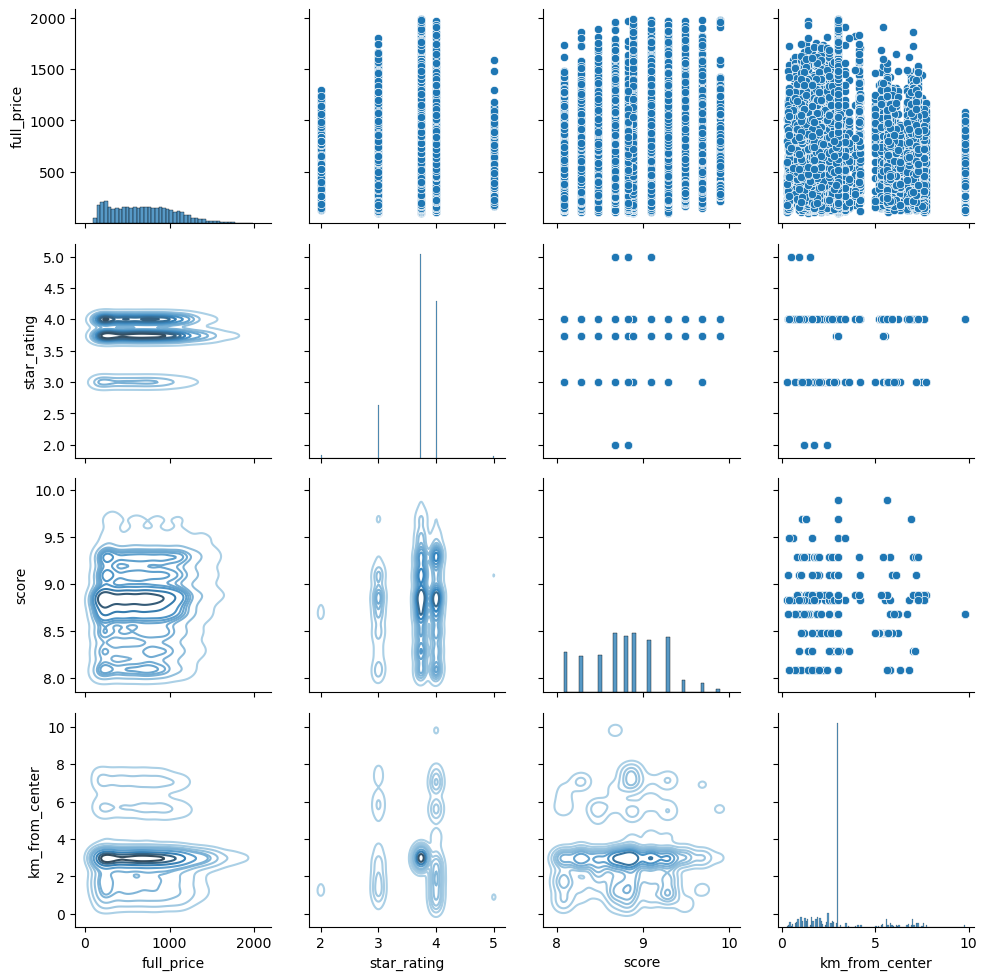

In [97]:
# Drop 'location_rating' and 'price' columns if they exist
df_temp = expedia_df.drop(columns=['location_rating', 'price','location','Limited_rooms','index'], errors='ignore')


# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
# numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Create a PairGrid to visualize pairwise relationships
    selected_features = ['full_price', 'star_rating', 'score', 'km_from_center']
    g = sns.PairGrid(numeric_df, vars=selected_features)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_diag(sns.histplot, kde_kws={'color': 'k'})
    plt.show()

# How's star rating effects on the full price avarage:
We can learn from the plot that there is lienar line, points on full price increase when the hotel star rating is up to 5.0

,star_rating,full_price
0,2.000000,615.045455
1,3.000000,633.070768
2,3.738393,736.697882
3,4.000000,677.877138
4,5.000000,649.763441


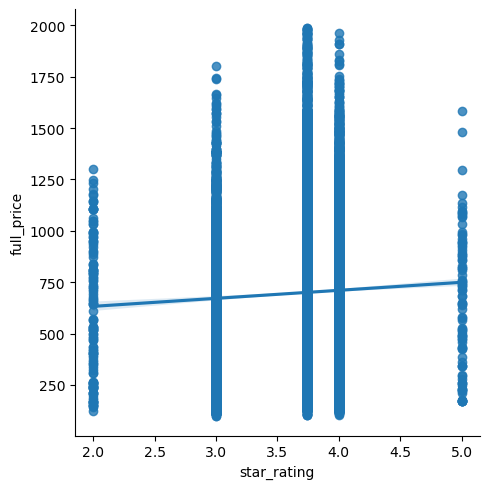

In [98]:
sns.lmplot(x='star_rating',y='full_price',data=expedia_df)


# Remove hotels that do not have a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Group by star_rating and calculate the average full_price
average_prices = data_filtered.groupby('star_rating')['full_price'].mean().reset_index()

# Display the results
average_prices

# Visualizing the Relationship Between Hotel Scores and Prices for Different Star Ratings

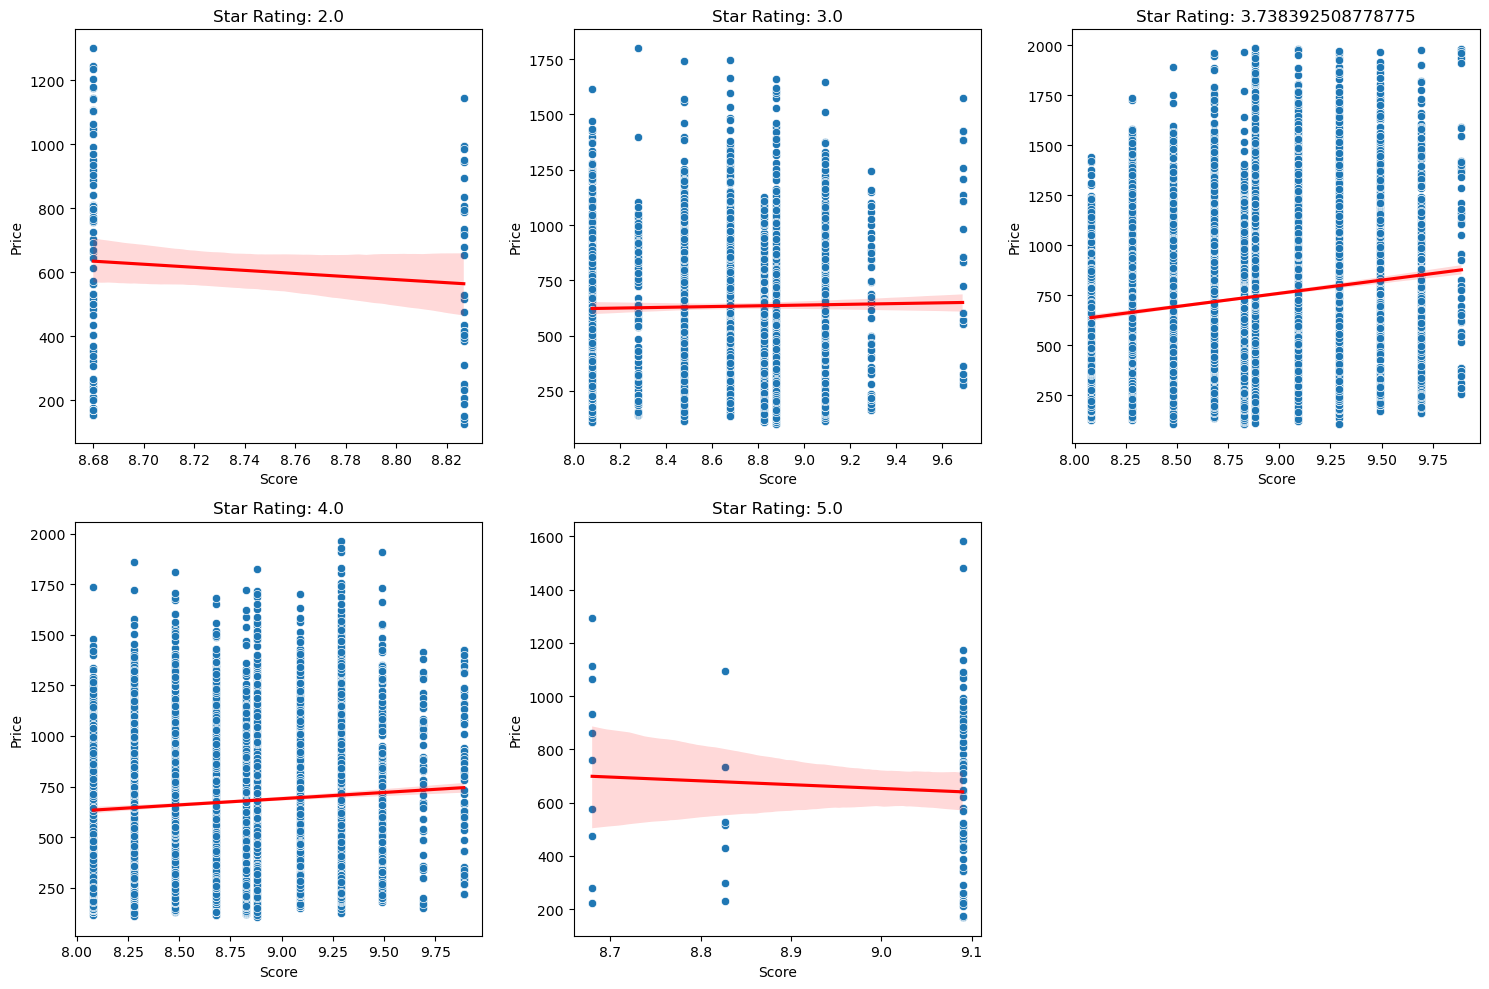

In [99]:
# Filter out hotels without a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Get unique star ratings
unique_star_ratings = sorted(data_filtered['star_rating'].unique())

# Create subplots with regression lines
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = data_filtered[data_filtered['star_rating'] == star]
    sns.scatterplot(x='score', y='full_price', data=star_data)
    sns.regplot(x='score', y='full_price', data=star_data, scatter=False, color='red')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Score')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Here you can see the relationship for each group (groups divided by star_rating as before) between the TTT and the average of the full price

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

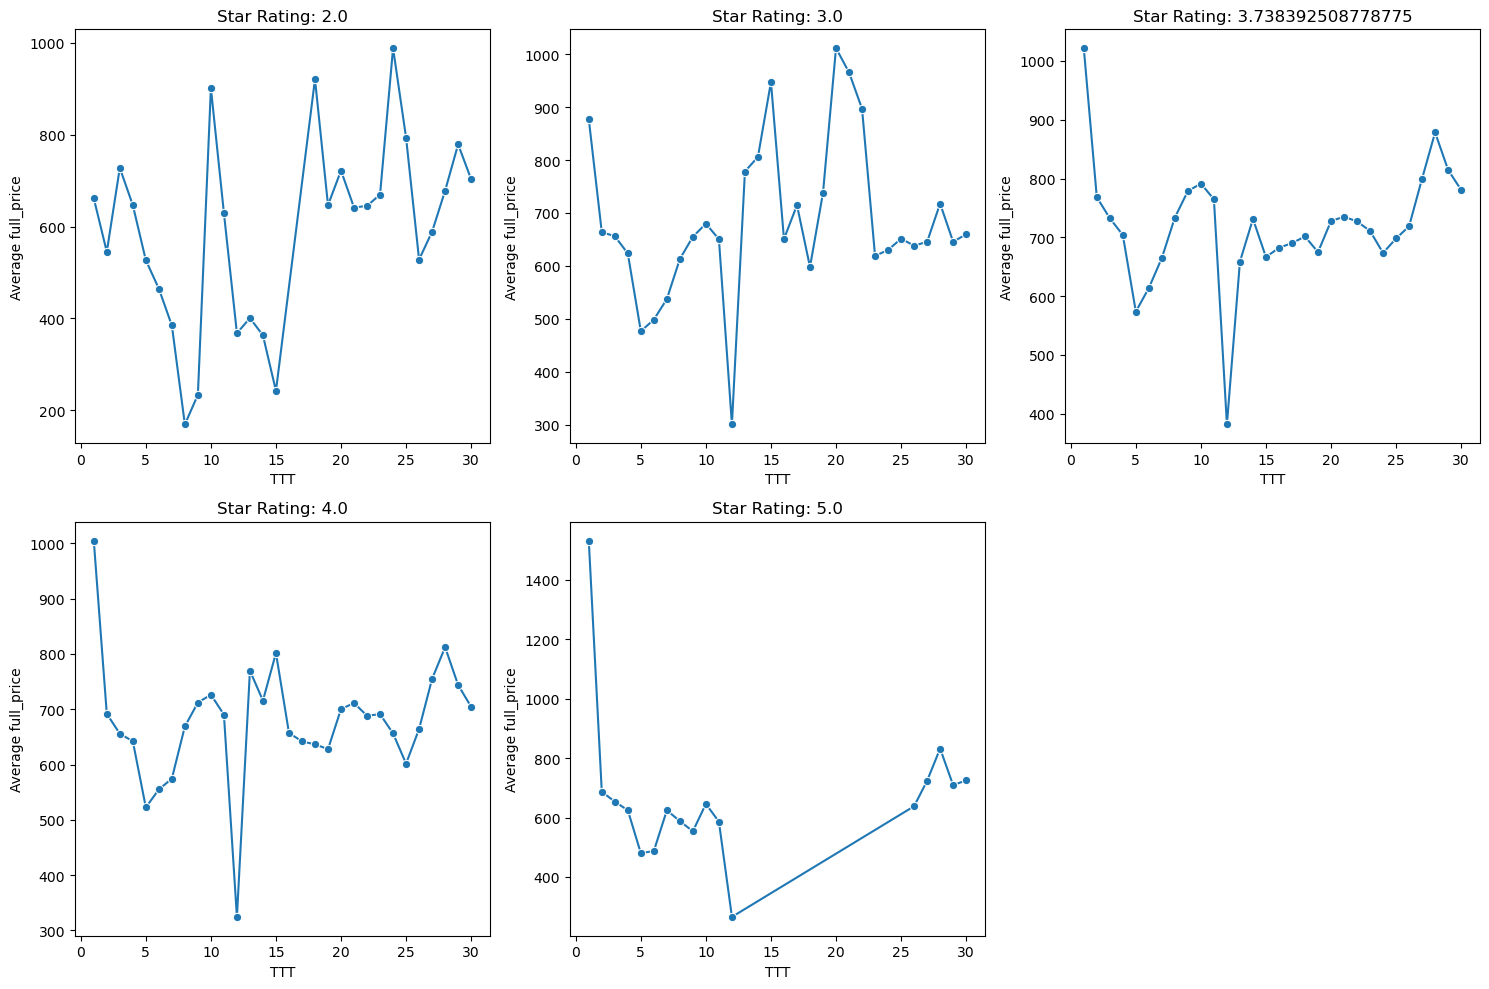

In [100]:
# Remove hotels that do not have a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Group by star_rating and TTT, then calculate the average full_price
average_prices_ttt = data_filtered.groupby(['star_rating', 'TTT'])['full_price'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(15, 10))

unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_ttt[average_prices_ttt['star_rating'] == star]
    sns.lineplot(x='TTT', y='full_price', data=star_data, marker='o')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('TTT')
    plt.ylabel('Average full_price')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4720\1155973893.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


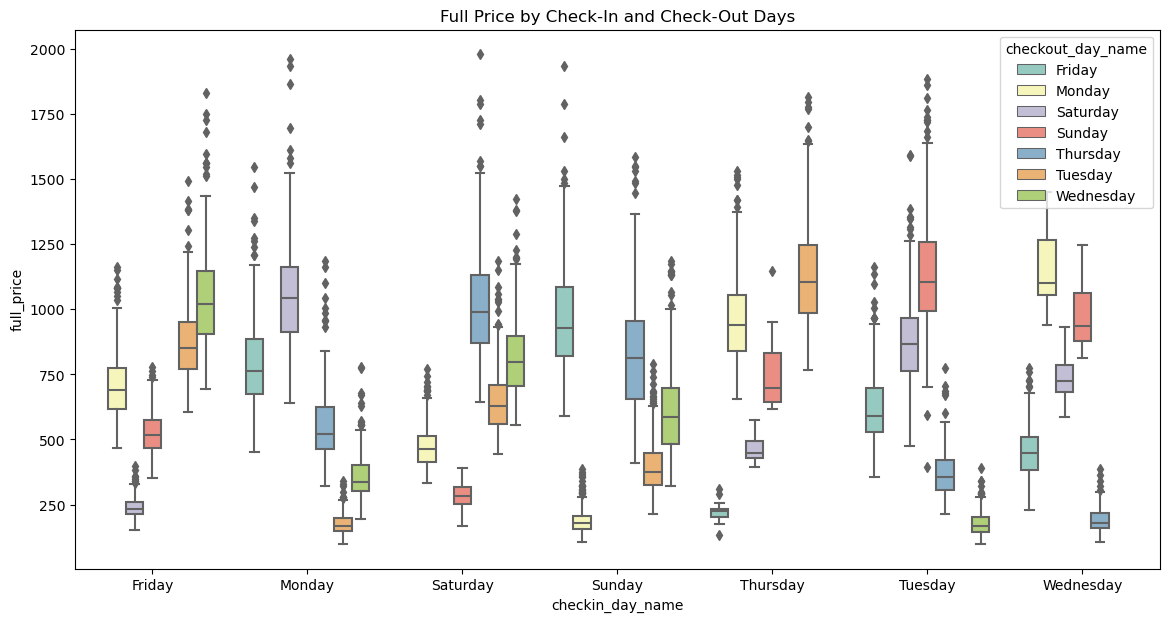

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [101]:
df = expedia_df.copy()

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Identify and handle outliers in 'price_per_night'
df['price_per_night'] = pd.to_numeric(df['price_per_night'], errors='coerce')

# Remove rows where 'price_per_night' is less than a reasonable minimum price (e.g., $10)
df = df[df['price_per_night'] > 10]

# Visualize the relationship between check-in and check-out days with price per night
plt.figure(figsize=(14, 7))
sns.boxplot(x='checkin_day_name', y='full_price', hue='checkout_day_name', data=df, palette='Set3')
plt.title('Full Price by Check-In and Check-Out Days')
plt.show()

# Prepare data for heatmaps based on star ratings
star_ratings = [1, 2, 3, 4, 5]
heatmap_data = {}
for star in star_ratings:
    heatmap_data[star] = df[df['star_rating'] == star].pivot_table(index='checkin_day_name', columns='checkout_day_name', values='full_price', aggfunc='mean')

# Create heatmaps for each star rating with annotations
for star in star_ratings:
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data[star], annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
    plt.title(f'Average Price per Night by Check-In and Check-Out Days for {star}-Star Hotels')
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4720\423807072.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_4720\423807072.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_checkin = data_filtered.groupby(['star_rating', 'checkin_day_name'])['full_price'].mean().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_4720\423807072.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

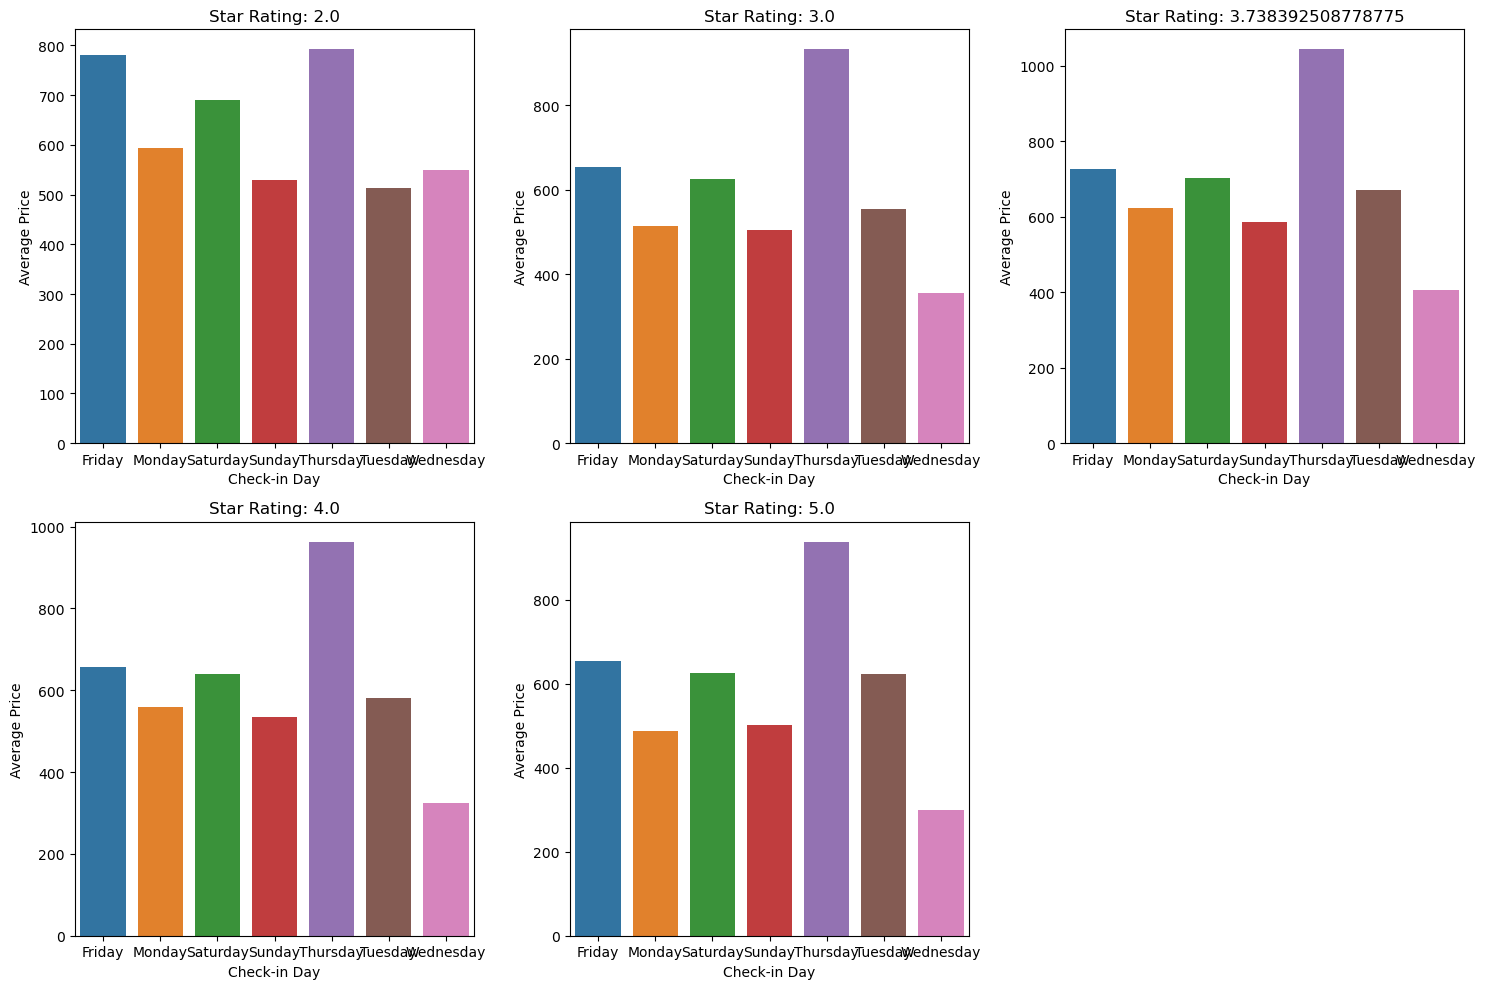

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

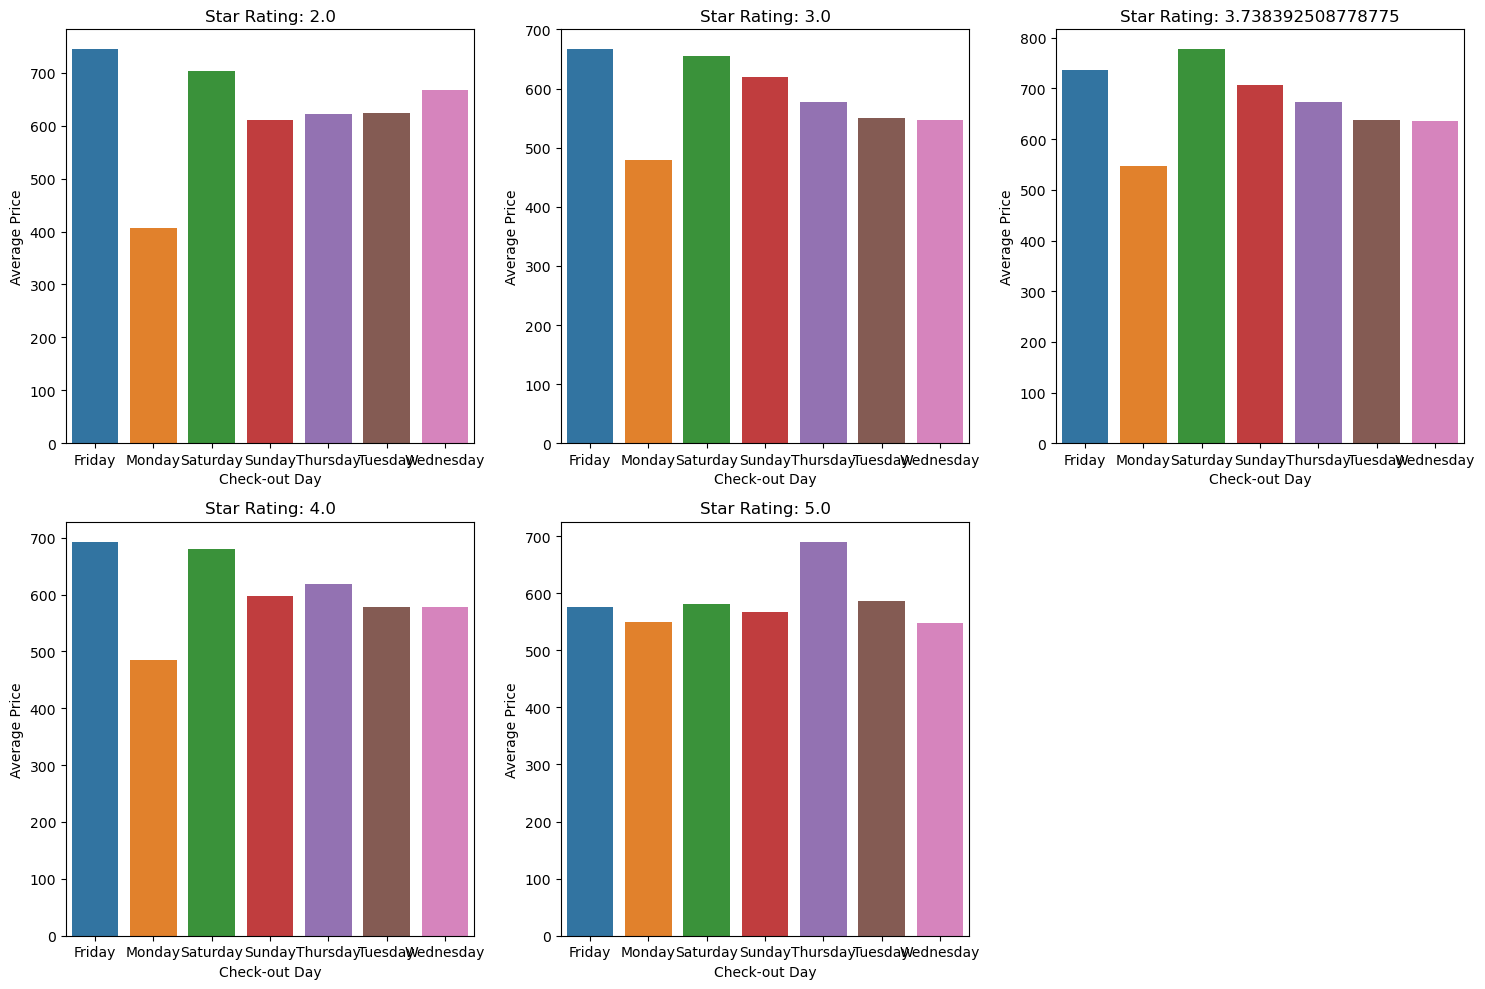

In [102]:
df = expedia_df.copy()
# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Group by star_rating and checkin_day_name, then calculate the average full_price
average_prices_checkin = data_filtered.groupby(['star_rating', 'checkin_day_name'])['full_price'].mean().reset_index()

# Group by star_rating and checkout_day_name, then calculate the average full_price
average_prices_checkout = data_filtered.groupby(['star_rating', 'checkout_day_name'])['full_price'].mean().reset_index()

# Plot the relationship between check-in day and price per night
plt.figure(figsize=(15, 10))
unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())
unique_checkin_days = sorted(df['checkin_day_name'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_checkin[average_prices_checkin['star_rating'] == star]
    sns.barplot(x='checkin_day_name', y='full_price', data=star_data, order=unique_checkin_days)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Check-in Day')
    plt.ylabel('Average Price')

plt.tight_layout()
plt.show()



# Plot the relationship between check-out day and price per night
plt.figure(figsize=(15, 10))
unique_checkout_days = sorted(df['checkout_day_name'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_checkout[average_prices_checkout['star_rating'] == star]
    sns.barplot(x='checkout_day_name', y='full_price', data=star_data, order=unique_checkout_days)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Check-out Day')
    plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [103]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Perform one-hot encoding for 'checkin_day_name', 'checkout_day_name', and 'period_of_the_month'
checkin_encoder = OneHotEncoder(sparse=False)
encoded_checkin = checkin_encoder.fit_transform(df[['checkin_day_name']])

checkout_encoder = OneHotEncoder(sparse=False)
encoded_checkout = checkout_encoder.fit_transform(df[['checkout_day_name']])

period_encoder = OneHotEncoder(sparse=False)
encoded_period = period_encoder.fit_transform(df[['period_of_the_month']])

# Create DataFrames for the encoded columns
encoded_checkin_df = pd.DataFrame(encoded_checkin, columns=checkin_encoder.get_feature_names_out(['checkin_day_name']))
encoded_checkout_df = pd.DataFrame(encoded_checkout, columns=checkout_encoder.get_feature_names_out(['checkout_day_name']))
encoded_period_df = pd.DataFrame(encoded_period, columns=period_encoder.get_feature_names_out(['period_of_the_month']))

# Drop the original columns and concatenate the new one-hot encoded columns
df = df.drop(columns=['checkin_day_name', 'checkout_day_name', 'period_of_the_month'])
df = df.join(encoded_checkin_df).join(encoded_checkout_df).join(encoded_period_df)


# Display the first few rows of the updated DataFrame
print(df.head())

  Snapshot  start_date    end_date  \
0      NaT  26/06/2024  27/06/2024   
1      NaT  26/06/2024  27/06/2024   
2      NaT  26/06/2024  27/06/2024   
3      NaT  26/06/2024  27/06/2024   
4      NaT  26/06/2024  27/06/2024   

                                           name  TTT  LOS  score  reviews  \
0                            Penny Williamsburg    1    1   9.69      505   
1  voco Fiorello - LaGuardia East, an IHG Hotel    1    1   8.48      248   
2                Best Western Queens Gold Coast    1    1   8.08     1007   
3                                   Radio Hotel    1    1   8.68     1727   
4                               The Ridge Hotel    1    1   8.08     1005   

   price_per_night  original_price  ...  checkout_day_name_Monday  \
0              369             419  ...                       0.0   
1              242             269  ...                       0.0   
2              227               0  ...                       0.0   
3              194             2

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


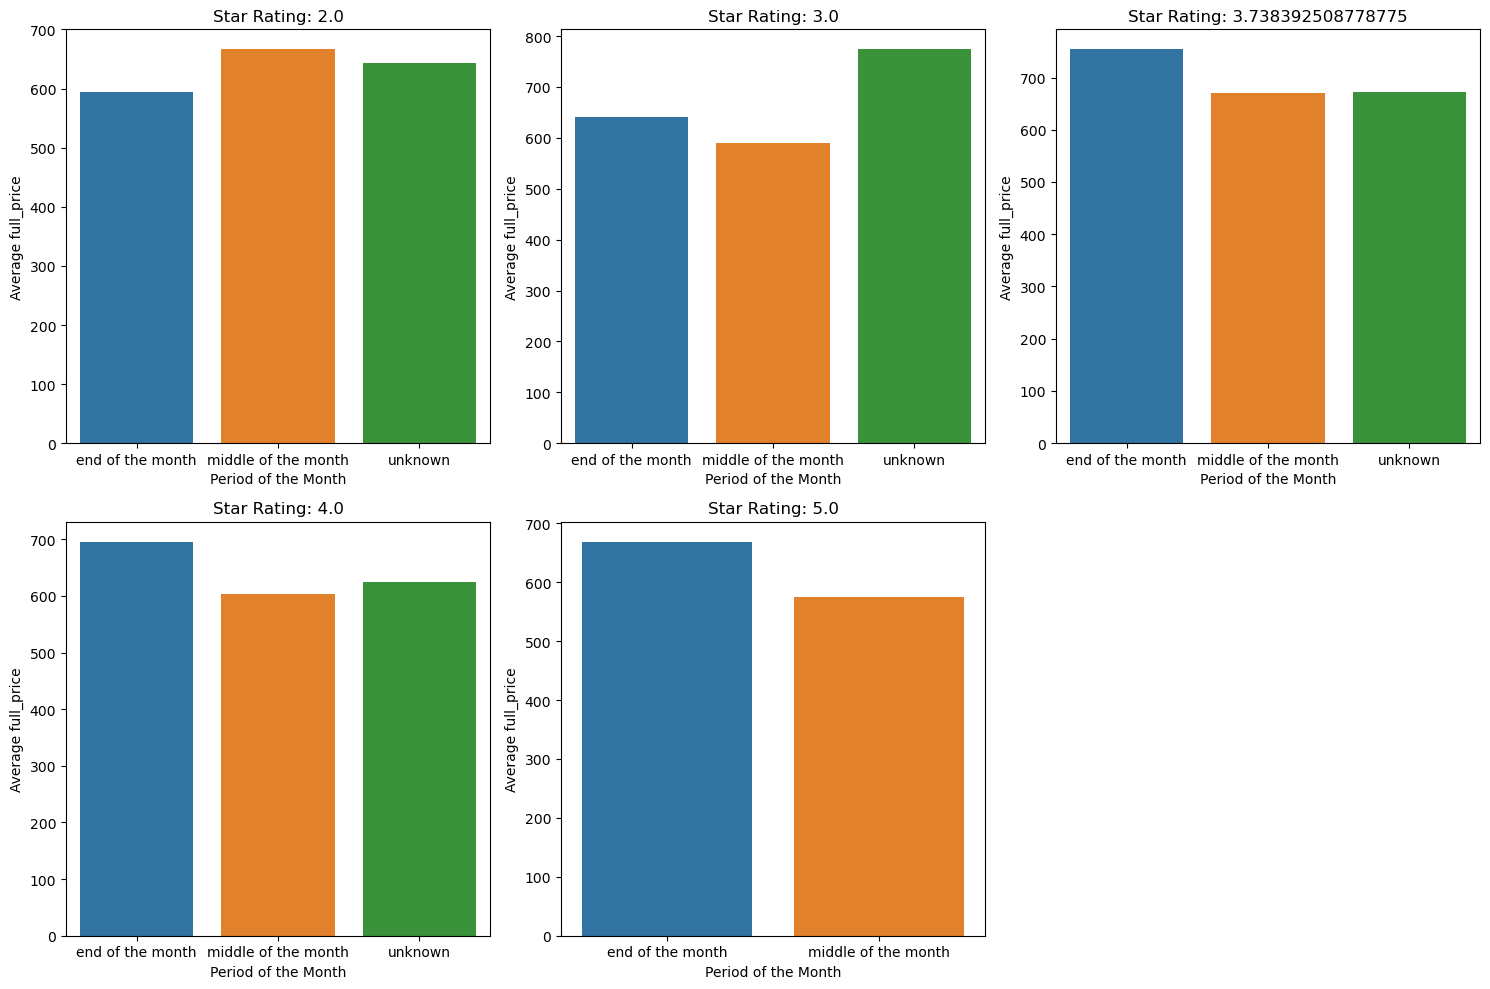

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3437360478.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


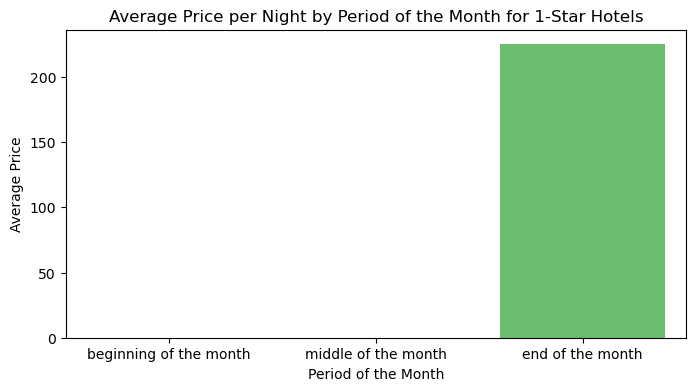

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3437360478.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


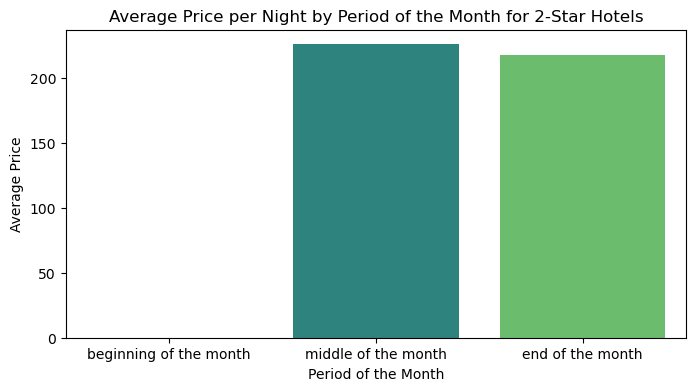

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3437360478.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


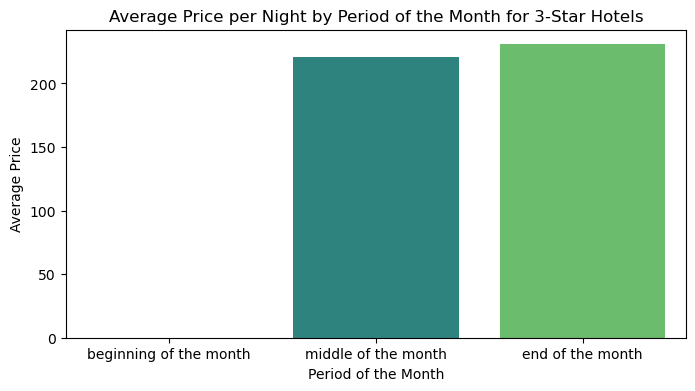

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3437360478.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


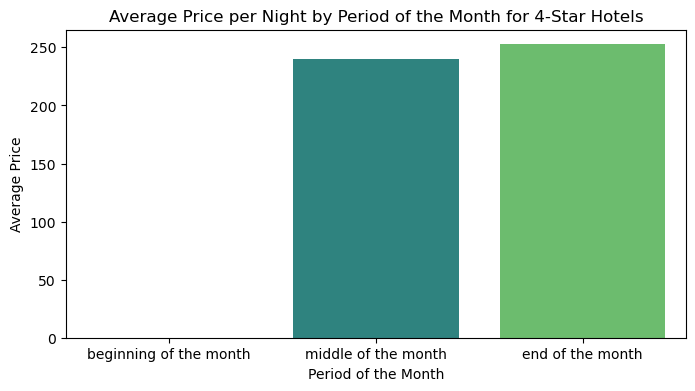

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3437360478.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


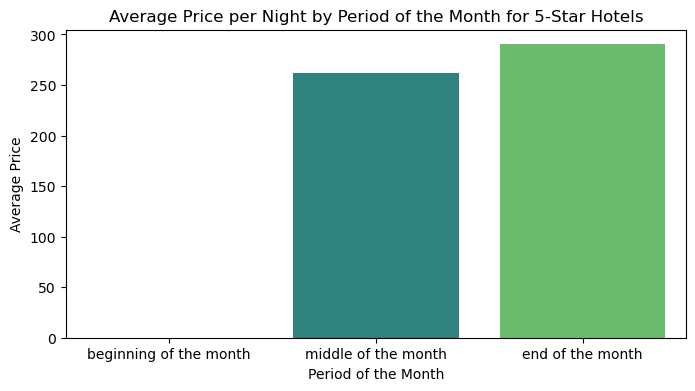

In [104]:
def decode_period(row):
    if row['period_of_the_month_middle of the month'] == 1.0:
        return 'middle of the month'
    elif row['period_of_the_month_end of the month'] == 1.0:
        return 'end of the month'
    return 'unknown'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(decode_period, axis=1)
average_price_per_period = df.groupby(['star_rating', 'period_of_the_month'])['full_price'].mean().reset_index()


# Get unique star ratings
unique_star_ratings = average_price_per_period['star_rating'].unique()

# Create subplots for each star rating
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_price_per_period[average_price_per_period['star_rating'] == star]
    sns.barplot(data=star_data, x='period_of_the_month', y='full_price')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average full_price')

plt.tight_layout()
plt.show()


# Create plots for each star rating
for star in sorted(star_ratings):
    df_star = df_filtered[df_filtered['star_rating'] == star]
    average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x='period_of_the_month', y='price_per_night', data=average_prices_period, palette='viridis')
    plt.title(f'Average Price per Night by Period of the Month for {int(star)}-Star Hotels')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average Price')
    plt.show()

In [105]:
df = expedia_df.copy()

# Remove hotels that do not have a star rating
df_filtered = df.dropna(subset=['star_rating'])

# Sort periods to ensure they appear in a logical order in the plot
period_order = ['beginning of the month', 'middle of the month', 'end of the month']
df_filtered['period_of_the_month'] = pd.Categorical(df_filtered['period_of_the_month'], categories=period_order, ordered=True)

# Create a list of unique star ratings
star_ratings = df_filtered['star_rating'].unique()

# Create plots for each star rating
for star in sorted(star_ratings):
    df_star = df_filtered[df_filtered['star_rating'] == star]
    average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x='period_of_the_month', y='full_price', data=average_prices_period, palette='viridis')
    plt.title(f'Average Price per Night by Period of the Month for {int(star)}-Star Hotels')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average Price')
    plt.show()

KeyError: 'period_of_the_month'

In [106]:
df = expedia_df.copy()

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())

C:\Users\User\AppData\Local\Temp\ipykernel_4720\2893061400.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')


  Snapshot  start_date    end_date  \
0      NaT  26/06/2024  27/06/2024   
1      NaT  26/06/2024  27/06/2024   
2      NaT  26/06/2024  27/06/2024   
3      NaT  26/06/2024  27/06/2024   
4      NaT  26/06/2024  27/06/2024   

                                           name  TTT  LOS  score  reviews  \
0                            Penny Williamsburg    1    1   9.69      505   
1  voco Fiorello - LaGuardia East, an IHG Hotel    1    1   8.48      248   
2                Best Western Queens Gold Coast    1    1   8.08     1007   
3                                   Radio Hotel    1    1   8.68     1727   
4                               The Ridge Hotel    1    1   8.08     1005   

   price_per_night  original_price  ...  location_rating        neighborhood  \
0              369             419  ...         9.445409             Unknown   
1              242             269  ...         9.445409             Unknown   
2              227               0  ...         9.445409            

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3795522884.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['full_price'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


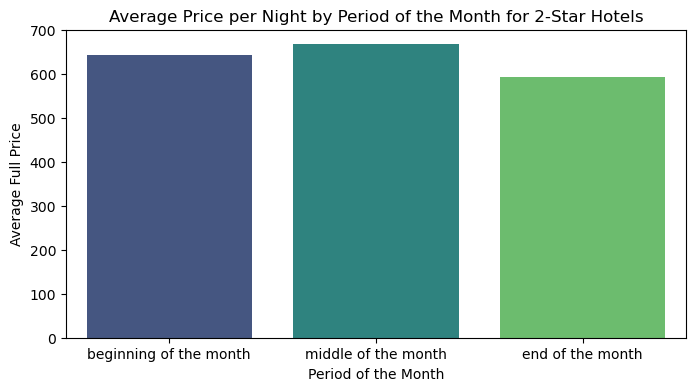

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3795522884.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['full_price'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


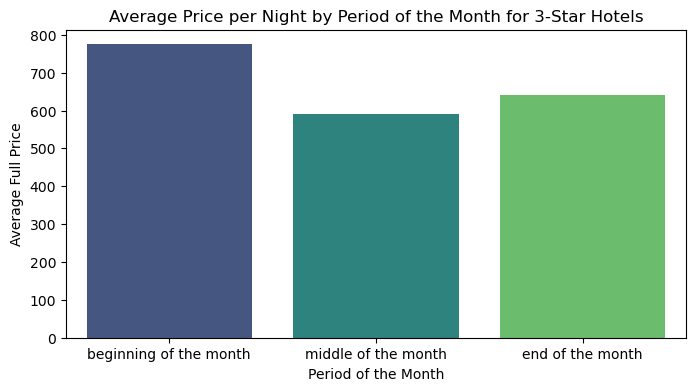

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3795522884.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['full_price'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


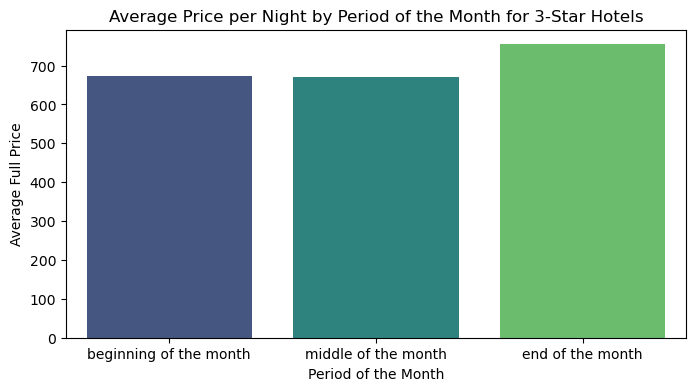

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3795522884.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['full_price'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


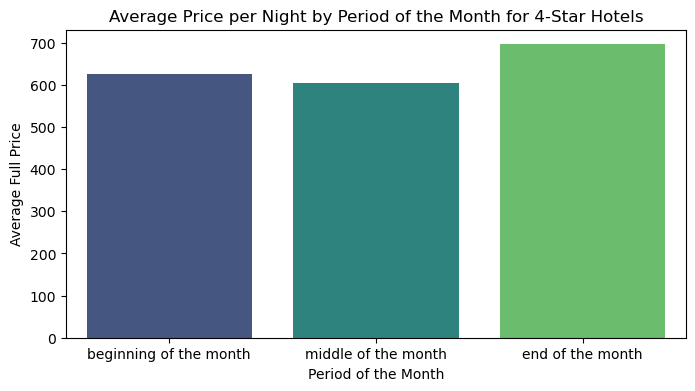

C:\Users\User\AppData\Local\Temp\ipykernel_4720\3795522884.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['full_price'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


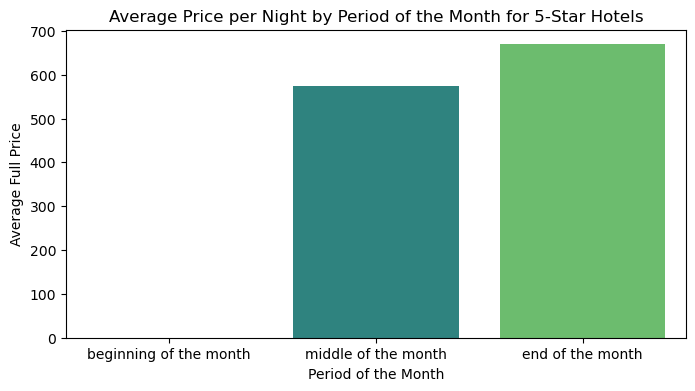

In [107]:
# Remove hotels that do not have a star rating
df_filtered = df.dropna(subset=['star_rating'])

# Sort periods to ensure they appear in a logical order in the plot
period_order = ['beginning of the month', 'middle of the month', 'end of the month']
df_filtered['period_of_the_month'] = pd.Categorical(df_filtered['period_of_the_month'], categories=period_order, ordered=True)

# Create a list of unique star ratings
star_ratings = df_filtered['star_rating'].unique()

# Create plots for each star rating
for star in sorted(star_ratings):
    df_star = df_filtered[df_filtered['star_rating'] == star]
    average_prices_period = df_star.groupby('period_of_the_month')['full_price'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x='period_of_the_month', y='full_price', data=average_prices_period, palette='viridis')
    plt.title(f'Average Price per Night by Period of the Month for {int(star)}-Star Hotels')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average Full Price')
    plt.show()